<a href="https://colab.research.google.com/github/sudiptaroyshuvo/sarprocessinginpython/blob/main/Coverage_Resolution_Timing_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
print(sys.executable)

/usr/bin/python3


In [ ]:
import scipy.constants as constants
import matplotlib.pyplot as plt
import numpy as np

Assuming a flat scene (i.e., a scene with flat topography), calculate and show the relationship between look and incident angles for an airborne and a spaceborne systems flying at 3 km and 514 km height, respectively. What can you observe? How is it related to the acquisition geometry

In [ ]:
# Define a function that computes the range distance r0 and the incidence angle given the acquisition geometry
# inputs: rE   - Earth radius
#         h    - platform altitude
#         look - look angle

def compute_r0_thetainc(rE, h, theta_look):
    b    = (rE + h) * 2 * np.cos(theta_look)
    c    = -(rE**2 - (rE + h)**2)
    r0   = (b - np.sqrt(b**2 - 4 * c)) * 0.5
    theta_inc   = np.arccos(((rE + h)**2 - rE**2 - r0**2)/(2 * r0 * rE))
    return r0, theta_inc

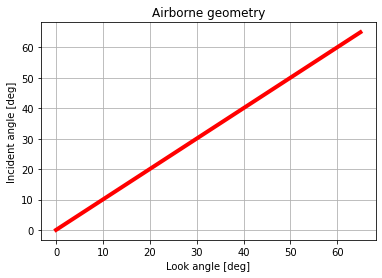

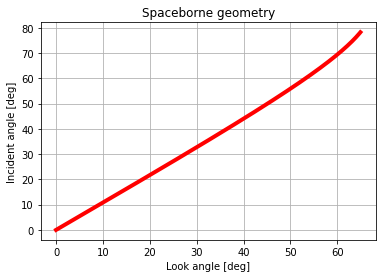

In [ ]:
rE   = 6371.e3  # Earth radius
N    = 1024
theta_look = (0. + np.arange(N) / N * 65.) * np.pi / 180.

## compute incidence angle
# airborne system
hAir = 3e3


_, theta_inc_air = compute_r0_thetainc(rE,hAir,theta_look)

# spaceborne system
hSat = 514.e3

_, theta_inc_spc = compute_r0_thetainc(rE,hSat,theta_look)

plt.figure()
plt.title('Airborne geometry')
plt.plot(theta_look * 180. / np.pi, theta_inc_air * 180. / np.pi, 'r', lw = 4)
plt.xlabel('Look angle [deg]')
plt.ylabel('Incident angle [deg]')
plt.grid()

plt.figure()
plt.title('Spaceborne geometry')
plt.plot(theta_look * 180. / np.pi, theta_inc_spc * 180. / np.pi, 'r', lw = 4)
plt.xlabel('Look angle [deg]')
plt.ylabel('Incident angle [deg]')
plt.grid()
plt.show()

For the airborne system, the incident angle and look angle are identical. For low lying aircraft, the effect of curvature is negligible. For this reason, the surface looks flat.

The incident angle is always larger than look angle for spaceborne system because of the the effect of curvature.

An airborne side-looking radar flying at 3000 m illuminates a swath with look angles ranging from 20 deg (near range) to 60 deg (far range). Compute the exact swath and express the percentual error with respect to its approximation. Discuss whether the approximation is acceptable and relate your observations to the plot in excercise 1.

In [ ]:
hAir = 3.e3     
rE   = 6371.e3  # Earth radius

N    = 1024
theta_look = np.arange(20,60,40/N) * np.pi / 180.

## compute range distance and incidence angle

r0, theta_inc = compute_r0_thetainc(rE,hAir,theta_look)

## compute swath using the precise formula

swath_air = hAir*(np.tan(np.max(theta_inc))-np.tan(np.min(theta_inc)))

# compute swath approximation
theta_el = np.max(theta_inc) - np.min(theta_inc)
idx = int(r0.size/2)
swath_approx = r0[idx] * theta_el / np.sin(theta_inc[idx])

print(np.min(theta_inc)*180/np.pi)
print(np.max(theta_inc)*180/np.pi)
print((np.min(theta_inc)-theta_look[0])/theta_look[0]*100)
print((np.max(theta_inc)-theta_look[1023])/theta_look[1023]*100)

print('Swath airborne:')
print(swath_air)
print('Swath airborne approximated:')
print(swath_approx)
print('Approximation error in percentage:')
print(abs(swath_air - swath_approx)/swath_air * 100)


20.009820095212298
60.00762703532369
0.04910047606148134
0.07786658659847775
Swath airborne:
4105.257160018027
Swath airborne approximated:
4251.87899614548
Approximation error in percentage:
3.5715627648234674


For Airborne system:

In swath approximation calculation, we use θ_elevation which is the subtraction of maximum and minimum incident angle. If we see the look angle for respective incident angle it is clearly visible that the incident angle for near and far range is almost samilar as the look angles (20 deg. and 60 deg.). And the difference is 0.05% to 0.07%. So the approximation is acceptable.

Compute the value of the swath of a spaceborne side-looking radar flying at 514 km and imaging a swath with the same range of look angles as in excercise 2. Express the error of the approximation and discuss the results. Relate your observations to the plot in excercise 1.

In [ ]:
hSat = 514.e3
rE   = 6371.e3  # Earth radius

N    = 1024
theta_look = np.arange(20, 60, 40/N) * np.pi / 180.

## compute range distance and incidence angle

r0, theta_inc = compute_r0_thetainc(rE,hSat,theta_look)

## compute swath with precise formula

swath_spc = hSat*(np.tan(np.max(theta_inc))-np.tan(np.min(theta_inc)))

# compute swath approximation
theta_el = np.max(theta_inc) - np.min(theta_inc)
idx = int(r0.size/2)
swath_approx = r0[idx] * theta_el / np.sin(theta_inc[idx])

print(np.min(theta_inc)*180/np.pi)
print(np.max(theta_inc)*180/np.pi)
print((np.min(theta_inc)-theta_look[0])/theta_look[0]*100)
print((np.max(theta_inc)-theta_look[1023])/theta_look[1023]*100)

print('Swath spaceborne:')
print(swath_spc)
print('Swath spaceborne approximated:')
print(swath_approx)
print('Approximation error in percentage:')
print(abs(swath_spc - swath_approx)/swath_spc * 100)


21.691793243545547
69.31330045186216
8.458966217727728
15.59742616076035
Swath spaceborne:
1156756.921649451
Swath spaceborne approximated:
827062.9762060196
Approximation error in percentage:
28.501575332984547


For Spaceborne System: According to the graph in ex.1 incident angle should be high. In our case, it is 21.69 degree and 69.313 degree for near and far range respectively.

Compute the coverage rate in km^2/s of the previous systems. Assume a footprint velocity of 100 m/s and 7000 m/s for the airborne and the spaceborne, respectively.

In [ ]:
#vg_air = 120  # [m/s]
vg_air = 100  # [m/s]
vg_spc = 7e3  # [m/s]

## Compute coverage for the two systems 
# airborne system
coverage_air = swath_air*vg_air/1e6   #km^2/s

# spaceborne system
coverage_spc = swath_spc*vg_spc/1e6    #km^2/s

print('Coverage for an airborne system [km^2/s]:')
print(coverage_air)
print('Coverage for a spaceborne system [km^2/s]:')
print(coverage_spc)

Coverage for an airborne system [km^2/s]:
0.4105257160018027
Coverage for a spaceborne system [km^2/s]:
8097.298451546156


Compute the echo window length, echo window position, range sampling and pulse repetition frequency of a side-looking airborne radar geometry, assuming a real aperture system flying at 100 m/s, operated at Ku-band with 100 MHz and a 3 m antenna. Discuss the results.

In [ ]:
def compute_r0_thetainc(rE, h, theta_look):
    b    = (rE + h) * 2 * np.cos(theta_look)
    c    = -(rE**2 - (rE + h)**2)
    r0   = (b - np.sqrt(b**2 - 4 * c)) * 0.5
    theta_inc   = np.arccos(((rE + h)**2 - rE**2 - r0**2)/(2 * r0 * rE))
    return r0, theta_inc
c0=constants.c


N    = 1024
theta_look = (0. + np.arange(N) / N * 65.) * np.pi / 180.
rE   = 6371.e3  # Earth radius
hAir = 6e-6  #6000m   
r0, theta_inc_air = compute_r0_thetainc(rE,hAir,theta_look)
 
f0=100   #MHz
t0=1/f0  #microseconds
wl =c0/(f0*1e6)  #m


tp=0.7    # 0.7 microseconds

#echo window length
t_EWL=(2*(np.max(r0)-np.min(r0))/c0)*1e6+tp  #micrseconds 
print('Echo Window Length in microseconds:')
print(t_EWL)

#Echo window position
EWP =(2*np.min(r0)/c0)*1e6  # near range

print('Echo window position in microseconds:')
print(EWP)

#Range sampling frequency:
#Br=1/(1*1e-6) #Hz
#RSF=Br*1e-6   #MHz

RSF=100  #100 MHz
print('Range sampling frequency in MHz:')
print(RSF) 

#Pulse Repetition Frequency:
vg=100  #m/s
L=3     #m
r=np.min(r0)
PRF=((vg*L)/(r*wl))*1e-6   # Hz to MHz
print('Pulse Repetition Frequency in MHz:')
print(PRF)   

#Pulse Repetition  Interval
PRI=1/PRF  #microseconds
print('Pulse Repetition  Interval in microseconds:')
print(PRI)

## compute swath using the precise formula
r0, theta_inc = compute_r0_thetainc(rE,hAir,theta_look)
swath_air = hAir*(np.tan(np.max(theta_inc))-np.tan(np.min(theta_inc)))
print(swath_air)


Echo Window Length in microseconds:
0.7000000544548503
Echo window position in microseconds:
4.0024889656649816e-08
Range sampling frequency in MHz:
100
Pulse Repetition Frequency in MHz:
16.679372244596713
Pulse Repetition  Interval in microseconds:
0.059954294762139516
1.2794247054348892e-05


We have assumed the transmitted pulse to be 0.7 microseconds. With this we got the above results. And also PRI=59958491.6 microseconds which is greater than both echo window length and tranmitted pulse. Additionally swath is determined by using precise formula which is 12897.68.


Compute the echo window length, echo window position, and PRF of an X-band spaceborne SAR system flying at 514 km with a 4.7 m antenna and illuminating a swath of 30 km around 35 deg incidence. Discuss the results.

In [ ]:
c0=299792458 #[m/s]
L_a=4.7 #[m]
t_p=5e-6 #[μs]
i_max=40 #[degree]
i_min=30 #[degree]
r0_max=(c0*t_p)/2*np.sin(i_max) #[km]
r0_min=(c0*t_p)/2*np.sin(i_min) #[km]
v_g=7000 #[m/s]

t_ewl=(2*(r0_max-r0_min)/c0)+t_p
t_ewp=(2*r0_min/c0)+t_p
prf=(2*v_g)/L_a

print('Echo Window Length')
print(t_ewl)
print('Echo Window Position')
print(t_ewp)
print('Pulse Repetition Frequency')
print(prf)

Echo Window Length
1.3665723922861054e-05
Echo Window Position
5.98418795356914e-08
Pulse Repetition Frequency
2978.723404255319


Here c0 is the velocity of propagation of the radar signals, t_p is a typical short pulse length in μs. In case of Echo Window Position minimum r0 is used as because EWP is the time between the pulse and the first echo. Hence minimum first echo might come from the shorest slant range. The PRF value tells us how many pulses of a signal are repeated in one second.

Compute the range resolution in slant and on ground for the airborne system described in exercise 1.

In [ ]:
c0=constants.c #m/s
Br= 100/ 1e-6 #MHz  #RSF>= Br
#range resolution in slant
def compute_delr (c0,Br):
    delr= c0/2 *Br
    return delr
delr= compute_delr(c0,Br) #m
print ('Range Resolution in Slant')
print (delr)  #m

#range resolution on ground
def compute_r0_thetainc(rE, h, theta_look):
    b    = (rE + h) * 2 * np.cos(theta_look)
    c    = -(rE**2 - (rE + h)**2)
    r0   = (b - np.sqrt(b**2 - 4 * c)) * 0.5
    theta_inc   = np.arccos(((rE + h)**2 - rE**2 - r0**2)/(2 * r0 * rE))
    return r0, theta_inc
N    = 1024
theta_look = (30. + np.arange(N) / N * 40.) * np.pi / 180.
rE   = 6371.e3  # Earth radius
hAir = 6e-6  #6000m   
r0, theta_inc_air = compute_r0_thetainc(rE,hAir,theta_look)

         
def compute_delrg(c0,Br,theta_inc_air):
    delrg = c0/2 *Br * (np.tan(np.max(theta_inc_air)))-np.tan(np.min(theta_inc_air))
    return delrg

del_rg = compute_delrg(c0, Br, theta_inc_air)
print ('Range Resolution on Ground')
print (del_rg) #m


Range Resolution in Slant
1.49896229e+16
Range Resolution on Ground
4.109618209680588e+16


If the value of Br becomes smaller the range resolution in slant as well as the range resolution on ground also becomes smaller. However, changes in look angle doesn't effect the value of the range resolution in slant. It only affects range resolution on ground. IF we fixed the higher value of the look angle, if the lower value increases, the range resolution on the ground increases too. Similar, relations found if we fixed the lower value and make changes in the higher

For the spaceborne system in exercise 2, compute the PRF, the azimuth resolution and discuss the results.

In [ ]:
L_a=4.7 #[m]
v_g=7000 #[m/s]
A_R = L_a/2 #[m]
PRF = (2*v_g)/L_a #[hz]
print(f'The azimuth resolution is: {A_R} m')
print(f'The Pulse Repetition Frequency is : {PRF} hz')

The azimuth resolution is: 2.35 m
The Pulse Repetition Frequency is : 2978.723404255319 hz


We assumed v_g to be 7000 m/s. The computed results are: For an X-band spaceborne SAR system the azimmuth resolution is 2.35 m which is the half of antenna size and PRF is 2978.723404255319 hz.